#Necessary imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
pd.set_option('display.max_rows', 60000)
import numpy as np
import matplotlib.pyplot as plt
import os

#Read dataset and turn it into a dataframe

In [3]:
#Change dir
os.chdir('/content/drive/MyDrive/Nowports')

##Create DataFrame

Here we can see the structure of the dataset

In [4]:
df = pd.read_csv('MTY.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,13,16,21,28,32,33,34,35,36,37,40,41,42,43,44,45,46,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Column,Calle,Causa,Ciudad,Cruce,Fecha,Hora,ID,Latitud,Lesionados,...,V2_Uso de Cinturón,V3_Arresto,V3_Dictamen,V3_Edad,V3_Estatus Licencia,V3_Género,V3_No. De Fallecidos,V3_No. De Lesionados,V3_Tipo de Vehículo,V3_Uso de Cinturón
0,0,CAMINO REAL,NO RESPETAR SEÑALAMIENTOS,Monterrey,SANTOS PALOMO,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY1,25.77443,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,BERNARDO REYES,Otros,Monterrey,FIDEL VELAZQUEZ,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY10,25.724161,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,BERNARDO REYES,Otros,Monterrey,REFORMA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY11,25.685874,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,LINCOLN,INVADIR CARRIL,Monterrey,CUMBRES DEL SOL,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY12,25.797401,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,MADERO,NO GUARDAR DISTANCIA,Monterrey,PABLO A DE LA GARZA,2016-05-01 00:00:00,1899-12-30 00:00:00,MTY13,25.682219,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory analysis

We'll be performing an exploratory analysis on the dataset to check for any relevant problems

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55013 entries, 0 to 55012
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Column                       55013 non-null  int64  
 1   Calle                        54998 non-null  object 
 2   Causa                        48986 non-null  object 
 3   Ciudad                       55009 non-null  object 
 4   Cruce                        53444 non-null  object 
 5   Fecha                        55010 non-null  object 
 6   Hora                         51656 non-null  object 
 7   ID                           55009 non-null  object 
 8   Latitud                      25551 non-null  object 
 9   Lesionados                   27935 non-null  object 
 10  Longitud                     34515 non-null  object 
 11  Mes                          54908 non-null  object 
 12  Muertos                      22379 non-null  object 
 13  No. De Infracció

As this summary of the data shows, we have some columns with null values but more importantly, we have columns which provide little information taking into account the dataset size. Such is the case with V3_Dictamen among others. Depending on the model we would choose to push to develop, we could either drop these columns of fill those values with appropiate data.
I choose not to drop any columns since I'm performing this only to check the nature of the dataset.

Since it was not clarified, from this point on, I assume that any column containing Vi (with i = 1, 2, 3) refers to the number of the vehicle involved. For example, V1_Edad means the age of the vehicle 1 involved in the collision.

This assumption will carry on throughout the document.

### Variable correlation

In [6]:
df.corr()

,Column,Número total de lesionados,Número total de muertos,V1_No. De Lesionados,V2_No. De Lesionados,V3_No. De Lesionados
Column,1.000000,-0.075944,-0.006046,-0.009623,-0.064711,0.007152
Número total de lesionados,-0.075944,1.000000,0.045652,0.805446,0.708347,0.238495
Número total de muertos,-0.006046,0.045652,1.000000,0.046872,0.048762,-0.001377
V1_No. De Lesionados,-0.009623,0.805446,0.046872,1.000000,0.171441,0.053973
V2_No. De Lesionados,-0.064711,0.708347,0.048762,0.171441,1.000000,0.043685
V3_No. De Lesionados,0.007152,0.238495,-0.001377,0.053973,0.043685,1.000000


As we can see in the correlation matrix , there's a strong correlation between the total number of people injured and the number of people injured in vehicle 1 and vehicle 2 (0.8 and 0.7 respectively).
This means that if we were to predict the total number of people injured in a collision using this dataset, we could make the predictions using the number of people injured in vehicles 1 and 2 since either variable is closely related to the total number of people injured in a collision.

# Questions and answers

## 1. Which roads appear to be the top 10 most dangerous roads of the Monterrey Metropolitan area?

The criteria used to determine the dangerousness of the road was whether or not the road had an incident in which someone died or got injured. 

To serve this purpose, first we're going to check for any data we may need to discard or remap in order to match our categorization criteria.

In this case, there were values which should be in a different category. Specifically, 1 should be remapped to 'Sí' since it means there's been an injured. Likewise, 0 should be remapped to 'No' since it means nobody was injured in the collision.

Similarly, 'HUYO' and 'SE RETIRO' are remapped to 'SD'

In [7]:
#Check which are the values of the column
df['Muertos'].value_counts()

No           19943
0             2020
Sí             362
SD              43
1                6
HUYO             3
SE RETIRO        2
Name: Muertos, dtype: int64

In [8]:
#We replace the values which don't comply with the categorization we're performing
df['Muertos'].replace(['HUYO', 'SE RETIRO'], 'SD', inplace=True)
df['Muertos'].replace(['0', '1'], 'Sí', inplace=True)
df['Muertos'].value_counts()

No    19943
Sí     2388
SD       48
Name: Muertos, dtype: int64

In [9]:
#We apply the same logic here
df['Lesionados'].value_counts()

No    24059
0      1985
SD      946
Sí      865
1        62
2        10
3         6
4         1
5         1
Name: Lesionados, dtype: int64

In [10]:
#Replacing values
df['Lesionados'].replace(['1', '2', '3', '4', '5'], 'Sí', inplace=True)
df['Lesionados'].replace('0', 'No', inplace=True)
df['Lesionados'].value_counts()

No    26044
SD      946
Sí      945
Name: Lesionados, dtype: int64

In [11]:
#We use loc to locate the streets where there have been deaths and we rank them 
#using value_counts()
road_list = df.loc[(df['Muertos'] == 'Sí') | (df['Lesionados'] == 'Sí'), 'Calle']
ranking = road_list.value_counts()
#We print the top 10 most dangerous roads
print(ranking[0:10])

JOSE VASCONCELOS     252
MORONES PRIETO       182
LAZARO CARDENAS      176
ALFONSO REYES        122
GOMEZ MORIN          106
CALZADA DEL VALLE     85
CALZADA SAN PEDRO     69
DIAZ ORDAZ            68
CORREGIDORA           52
HUMBERTO LOBO         36
Name: Calle, dtype: int64


## 2. What's the age group with the overall highest number of reported collisions? You can consider any age groupings for the purposes of this question. Explain this in a graphical way.

To answer this question, I decided to take into account only the ages of the people in the vehicle 1 since it was the column with the most data in it.
First, we're gonna check for inconsistent data within the column and keep only the relevant content.

In [12]:
df['V1_Edad'].value_counts()

SD                     3218
30                     1525
27                     1494
25                     1488
26                     1482
34                     1468
24                     1464
28                     1463
23                     1424
32                     1353
29                     1343
31                     1284
36                     1253
33                     1253
22                     1241
35                     1222
42                     1138
37                     1131
21                     1119
40                     1102
39                     1100
38                     1079
20                     1072
43                     1044
45                     1042
41                     1011
Otro                    930
46                      855
44                      854
19                      789
47                      767
48                      730
50                      701
18                      673
49                      665
53                  

As can be seen, there are many rows with the wrong data format. In order not to alter the result of question 3, we're going to create a new dataframe, filter the wrong formatted data and show the result in a bar plot.

Collisions array: [15904 21052  6651   722     2]



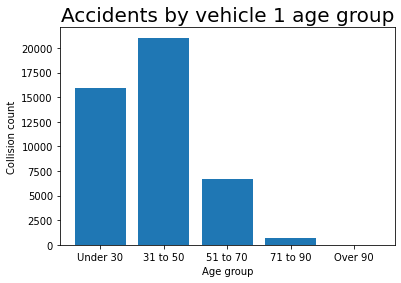

In [13]:
#Create new dataframe using the original
df2 = df
#Change the cell format to numeric. We use errors='coerce' to set any invalid parsing as NaN
df2['V1_Edad'] = pd.to_numeric(df2['V1_Edad'], errors='coerce')
#Replace NaN values with 0
df2 = df2.replace(np.nan, 0, regex=True)
#Change the dtype of the column to int
df2['V1_Edad'] = df2['V1_Edad'].astype(int)
#Filter the content of the column. We keep only the ages between 18 and 99
df2 = df2.loc[(df2['V1_Edad'] > 18) & (df2['V1_Edad'] < 99)]
#We create a new data frame in which we're going to group by age
df_ages = df2.join(pd.get_dummies(pd.cut(df['V1_Edad'], bins=(0, 30, 50, 70, 90, 100), 
                                         labels=['Under 30','31_to_50','51_to_70','71_to_90','Over 90'])))
#We create a list for each of the age group. This can be done more efficiently
#But for illustration purposes, I consider it to be enough
under_30 = df_ages['Under 30'].value_counts().values.tolist()
over_30to50 = df_ages['31_to_50'].value_counts().values.tolist()
over_51to70 = df_ages['51_to_70'].value_counts().values.tolist()
over_71to90 = df_ages['71_to_90'].value_counts().values.tolist()
over_90 = df_ages['Over 90'].value_counts().values.tolist()
#Create numpy arrays for the crashes count and the age group
crashes_array = np.array([under_30[1], over_30to50[1], over_51to70[1], over_71to90[1], over_90[1]])
age_group = np.array(['Under 30', '31 to 50', '51 to 70', '71 to 90', 'Over 90'])
#Print the array for illustration purposes
print(f"Collisions array: {crashes_array}\n")
#Plot
plt.title('Accidents by vehicle 1 age group', fontsize=20)
plt.xlabel('Age group')
plt.ylabel('Collision count')
plt.bar(age_group, crashes_array)
plt.show()


With the considerations taken, we can see that the age group with the highest number of reported collisions is the one between ages 31 and 50.
It's worth noting that the age group over 90 doesn't show in the plot because of the scalling of the y axis. Also, there are very few over 90 years old drivers on the dataset.

## 3. If you were to see a collision in the "Garza Sada" road, What would be the odds for that person to have any type of positive alcohol ingestion opinion?

In [14]:
#Check the values of the column
df['Por alcohol'].value_counts()

No                    12432
Ninguno                3254
Sí                     1797
SD                     1342
No ebrio                369
Ebrio completo           52
Ebrio incompleto         10
HUYO                      9
Aliento alcohólico        5
Efectos de droga          1
Name: Por alcohol, dtype: int64

In [15]:
#Get the number of crashes for Garza Sada on the dataset
garza_sada_count = len(df[df['Calle'] == 'GARZA SADA'])
print(garza_sada_count)

1215


In [16]:
#List to match the requirements
alcohol_list = df.loc[(df['Por alcohol'] == 'Sí') | (df['Por alcohol'] == 'Ebrio completo') 
                    | (df['Por alcohol'] == 'Ebrio incompleto') | 
                    (df['Por alcohol'] == 'Aliento alcohólico'),
                    'Calle'] 
#Rank values                   
ranking = alcohol_list.value_counts()
print(ranking[0:10])
#Get the value of the road requested
garza_sada_alcohol_collisions = ranking[1].sum()
#Percentage
collision_pct = (garza_sada_alcohol_collisions / garza_sada_count) * 100
print(f"Total number of crashes involving alcohol ingestion: {collision_pct} %")

AV. LINCOLN           424
GARZA SADA             82
MORONES PRIETO         70
GONZALITOS             69
REVOLUCION             44
CONSTITUCION           41
LAZARO CARDENAS        41
CARRETERA A GARCIA     38
LINCOLN                37
MADERO                 36
Name: Calle, dtype: int64
Total number of crashes involving alcohol ingestion: 6.748971193415638 %


## 4. Why do you think we use the phrase "appear to be"in question 1? What would you need to be able to speak with more confidence about the answer to that question?

Because there's not conclusive information to make such affirmation.
The criteria chosen was to deem the road dangerous based on whether or not there had been people dead or injured in the accident. 
There's not any data about the traffic volume of any of the roads, for example. Any of the accidents on any road could've happened on a road much less congested than any other on the dataset. So, to label a road as dangerous without taking into account the traffic volume of it is, in my opinion, not a strong enough argument to do so. 

Another thing that could happen is that the dataset could be biased. In such case, the results of the analysis would be biased as well and the conclusions based on it wouldn't be the right ones.

In conclusion, there's not enough information to properly label a road as dangerous with the dataset given.

## 5. What modeling project would you push to develop from the conclusions in this dataset?"

The possibilities are many but I'll list two options:

*   We could build a predictive model that, given the probability of accident for each intersection on a given date, predicts the probability of death or injury. This would prove particularly useful to any city's DMV to prevent colissions as well as efficiently direct their resources and, in extreme cases, work together with emergency services.
*   Another model could be the collision ocurrence rate given the state of the road and/or the weather condition. This would prove useful to the city hall to efficiently manage the budget approved while keeping citizens safe and pleased.
